# Projeto Predição Câncer de mama!
link para fonte do Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 

**Etapas do projeto**

**Objetivo:**
Segundo dados do Instituto Nacional do Cancer (INCA)no ano de 2014 o cancer de mama é o tipo mais frequente da câncer em mulheres do mundo, bem como é responsavel pelo maior número de mortes no mesmo ano. Essa informação nos da indícios claros da importância sobre sua investigação precoce para que assim, esses números sejam cadas vez menores.
Seu diagnóstico é feito por exames laboratoriais ou em casos de nódulo aparente, pode ser feito de maneira palpável pelo profissional da saúde.

Como nosso modelo parte do princípio dos resultados laboratoriais, vamos analisar nossa assertividade.

**Dados:** Como fonte foi utilizado a base do winsconsin, disponbilizado no link acima citado. A importação é realizada de forma direta, ou seja, não é necessário realizar o download da base para importação dos dados.

**Análise Exploratória:**

- Dados estão com 32 dimensões e 569 logs de dados e nenhum dado nulo. Na utilização do método describe() não conseguimos notar de imediato um outlier pela proximidade dos dados estarem de acordo com os quartis. Duas variaveis acabaram se sobressaindo, area_worst e area_mean, o ideal seria conversar com um responsável técnico da área para identificar se estes valores estariam com desvio realmente. Como não tenho esse conhecimento técnico, optei por deixá-los na base.   
- Uma coluna do dataset está incorreta, onde acabei removendo do modelo.
- A base contem variaveis númericas e uma variavel nominal, nomeada como 'Diagnosis'. Está é a nossa variavel alvo do modelo. 
- 63% dos dados correspondem a diagnósticos benignos.

**Modelo de Machine Learning**

Preparei os dados para rodar o modelo de machine learning:
- Alterei para dados númericos.
- Exclui nosso variavel alvo.
- Comparei ao fim a assertividade do modelo embasado no próprio dataset train (excluindo a variavel alfo, 'diagnosis'), já que não temos uma base test.

Utilizei a bibliteca pycaret para que assim fizesse os testes dos modelos comparando as assertividades entre si. Facilitando o dia a dia do cientista de dados e assim ganhar produtividade quanto a código.

**Obs:** Inseri comentários nos kernells para melhorar entendimentos.

**Inf: da Base:**

- Attribute Information:

1) ID number/ 2) Diagnosis (M = malignant, B = benign)/ 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

**Primeira etapa faço as importações das biblitecas utilizadas no notebook!**

In [1]:
!pip3 install xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


# Importação das bibliotecas

In [4]:
!pip install cufflinks --upgrade

Processing c:\users\william cararo\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866\cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from plotly.offline import plot, iplot

In [6]:
cf.go_offline()

**Ingest do Dataset**

In [7]:
# importar o dataset em csv 
data_path = "https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1" 
df = pd.read_csv(data_path)
df.sample(10)
# Conseguimos ver na importação do dado que a última coluna serve apenas para pesaro modelo ja que deve estar com erro.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
20,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
12,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,...,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230,NaN
148,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.05532,...,19.85,108.60,766.9,0.13160,0.27350,0.31030,0.15990,0.2691,0.07683,NaN
526,91813701,B,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,...,25.16,101.90,719.8,0.16240,0.31240,0.26540,0.14270,0.3518,0.08665,NaN
202,878796,M,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762,NaN
18,849014,M,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,...,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615,NaN
441,909445,M,17.27,25.42,112.40,928.8,0.08331,0.11090,0.12040,0.05736,...,35.46,132.80,1284.0,0.14360,0.41220,0.50360,0.17390,0.2500,0.07944,NaN
291,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,NaN
270,8910721,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,NaN
268,8910506,B,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,...,23.64,89.27,597.5,0.12560,0.18080,0.19920,0.05780,0.3604,0.07062,NaN


In [8]:
# eliminar uma coluna com erro
df.drop('Unnamed: 32', axis=1, inplace=True)

**Análise exploratória**

In [9]:
#Como a base de dados está formada? Dimensões e linhas!
print('Linhas/Colunas do Dataset\n')
print('Quantidade de Linhas:\t{}'.format(df.shape[0]))
print('Quantidade de Colunas:\t{}'.format(df.shape[1]))

Linhas/Colunas do Dataset

Quantidade de Linhas:	569
Quantidade de Colunas:	32


In [10]:
#verificação de dados nulos. 
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Com o método describe veremos um resumo do dataset como:**

- Variância dos dados

- Média e Mediana

- Quartis do Dataset

- Valor máximo.

Estes dados contribuem para verificar a consistência da base bem como seus outliers.

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Após garantirmos uma importação consistente, temos de analisar o tipo(dtype) de variável e como ele foi importado para trabalharmos com segurança**


In [12]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
# Por segurança vejo os valores únicos de cada coluna, deduzindo como foi a coleta de dados
print('Total de linhas: \t{}'.format(df.shape[0]))
print('Valores únicos das colunas do Dataset:')

df.nunique().sort_values()

Total de linhas: 	569
Valores únicos das colunas do Dataset:


diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
concavity_mean             537
compactness_mean           537
concavity_worst            539
area_mean                  539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
id                         569
dtype: i

In [14]:
# Irei verificar o percentual de diagnosticos realizado pela váriavel diagnosis, nossa informação chave.
print('Percentual de diagnósticos:')
print(df.diagnosis.value_counts(normalize=True).map('{:.0%}'.format))

df['diagnosis'].iplot(kind='hist',title='Agrupamento de Diagnósticos\t')

Percentual de diagnósticos:
B    63%
M    37%
Name: diagnosis, dtype: object


<ipython-input-15-c4824d45141e>:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



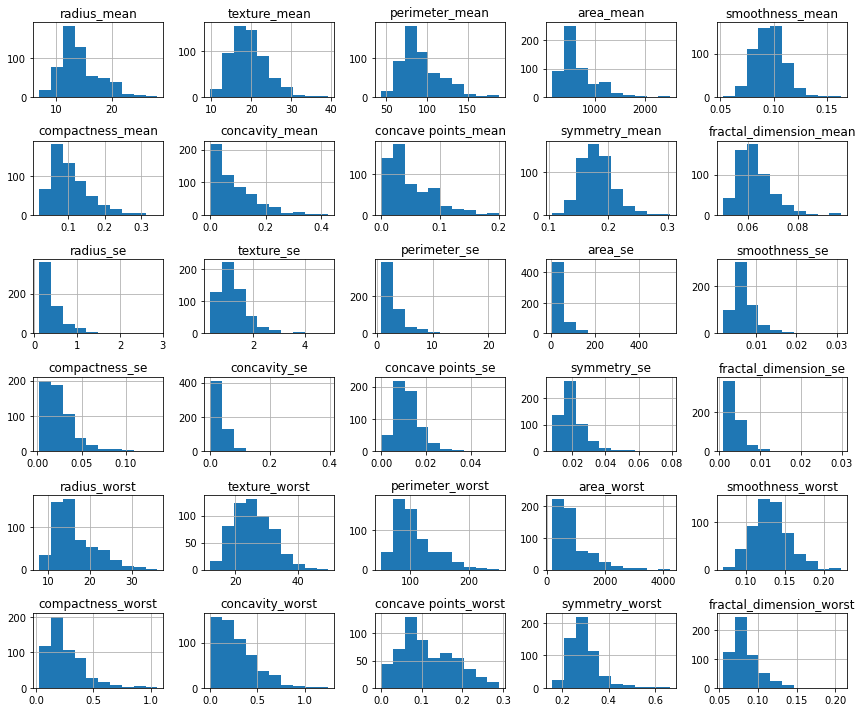

In [15]:
# Realizo a plotagem do histograma das features, para identificar o tipo de assimetria da base.
# Olhando o histograma conseguimos identificar que o DF é composto em sua maioria pos uma assimetria positiva.
fix, ax = plt.subplots(figsize=(12,10))
df.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

<AxesSubplot:>

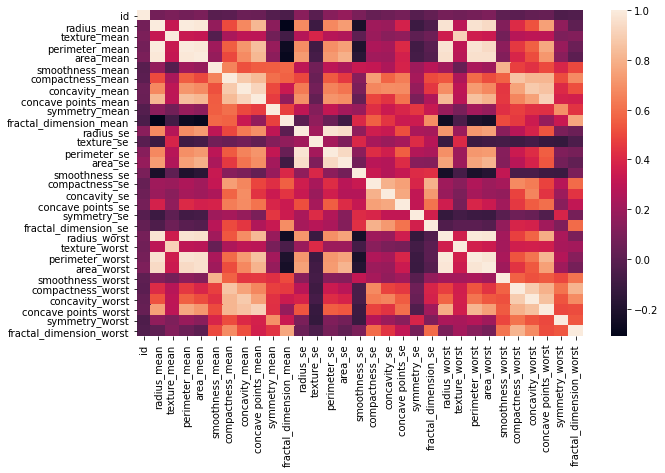

In [16]:
#Plotando gráfico de correlação entre as váriaveis.

plt.figure(figsize =(10,6))
cor = df.corr()
sns.heatmap(cor,annot =False)



#Etapa de Machine learning

In [21]:
!pip install pycaret[full]

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

awscli 1.19.105 requires colorama<0.4.4,>=0.2.5, but you'll have colorama 0.4.4 which is incompatible.



  Using cached colorlog-5.0.1-py2.py3-none-any.whl (10 kB)
  Using cached isodate-0.6.0-py2.py3-none-any.whl (45 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
Processing c:\users\william cararo\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122\pyperclip-1.8.2-py3-none-any.whl
  Created wheel for gpustat: filename=gpustat-0.6.0-py3-none-any.whl size=12626 sha256=3192b5cd1dbcb36bf6e753a873295b8eb331a17fc489a0480c538342de0b3103
  Stored in directory: c:\users\william cararo\appdata\local\pip\cache\wheels\0d\d9\80\b6cbcdc9946c7b50ce35441cc9e7d8c5a9d066469ba99bae44
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19196 sha256=840e3a7999316810ec1c54ed959acf984cb9db345dff34aa090c99b46828e9a7
  Stored in directory: c:\users\william cararo\appdata\local\pip\cache\wheels\b9\b1\68\cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
Successfully built gpustat nvidia-ml-py3
  Attempting uninstall: docutil

In [22]:
# Importação da biblioteca pycaret para que rodemos o modelo de machine learning.
from pycaret.regression import *

In [23]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [24]:
#Definindo as features para o modelo.
numeric_features= ['radius_mean','texture_mean','perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

In [25]:
# Nesta etapa configuro todas as váriaveis para o meu modelo de machine learning. Embasadas nos gráficos plotados anteriormente.
s = setup( df
          ,target = 'diagnosis'
          ,numeric_features= ['radius_mean'
                              ,'texture_mean'
                              ,'perimeter_mean'
                              , 'area_mean'
                              ,'smoothness_mean'
                              ,'compactness_mean'
                              ,'concavity_mean'
                              ,'concave points_mean'
                              ,'symmetry_mean'
                              ,'fractal_dimension_mean'
                              ,'radius_se','texture_se'
                              ,'perimeter_se','area_se'
                              ,'smoothness_se'
                              ,'compactness_se'
                              ,'concavity_se'
                              ,'concave points_se'
                              ,'symmetry_se'
                              ,'fractal_dimension_se'
                              ,'radius_worst'
                              ,'texture_worst'
                              ,'perimeter_worst'
                              ,'area_worst'
                              ,'smoothness_worst'
                              ,'compactness_worst'
                              ,'concavity_worst'
                              ,'concave points_worst'
                              ,'symmetry_worst'
                              ,'fractal_dimension_worst']
          ,log_experiment = True
          ,experiment_name = 'exp'
         )

,Description,Value
0,session_id,8835
1,Target,diagnosis
2,Original Data,"(569, 32)"
3,Missing Values,False
4,Numeric Features,31
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(398, 30)"


2021/07/03 14:12:06 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [26]:
best = compare_models(fold = 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0677,0.0272,0.1603,0.8785,0.1153,0.0897,0.0690
catboost,CatBoost Regressor,0.0762,0.0284,0.1627,0.8722,0.1158,0.1061,3.7500
ada,AdaBoost Regressor,0.0627,0.0295,0.1545,0.8651,0.1096,0.0830,0.0470
lightgbm,Light Gradient Boosting Machine,0.0924,0.0340,0.1798,0.8488,0.1280,0.1170,0.1880
rf,Random Forest Regressor,0.0765,0.0364,0.1838,0.8371,0.1320,0.1019,0.1110
gbr,Gradient Boosting Regressor,0.0840,0.0424,0.2000,0.8106,0.1412,0.1144,0.0910
xgboost,Extreme Gradient Boosting,0.0720,0.0448,0.2048,0.8021,0.1444,0.0923,0.2200
ridge,Ridge Regression,0.2030,0.0641,0.2525,0.7181,0.1789,0.2629,0.0060
br,Bayesian Ridge,0.2055,0.0656,0.2554,0.7116,0.1809,0.2660,0.0070
dt,Decision Tree Regressor,0.0806,0.0806,0.2752,0.6486,0.1907,0.1235,0.0070


In [27]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
#Create a train adaboost classifier
et= create_model('et', fold=10)
print(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0480,0.0080,0.0896,0.9657,0.0717,0.0447
1,0.0632,0.0264,0.1623,0.8745,0.1117,0.1158
2,0.0840,0.0500,0.2237,0.7332,0.1549,0.1980
3,0.0483,0.0129,0.1134,0.9414,0.0829,0.0685
4,0.0628,0.0146,0.1209,0.9391,0.0861,0.0788
5,0.0853,0.0291,0.1706,0.8809,0.1326,0.0582
6,0.0595,0.0375,0.1937,0.8399,0.1412,0.0780
7,0.0703,0.0329,0.1815,0.8552,0.1294,0.0893
8,0.0864,0.0368,0.1918,0.8527,0.1338,0.0837
9,0.0690,0.0241,0.1552,0.9020,0.1087,0.0818


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8835, verbose=0, warm_start=False)


In [29]:
tuned_ada = tune_model(et,fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0666,0.0285,0.1689,0.8724,0.1130,0.1286
1,0.0648,0.0339,0.1840,0.8347,0.1278,0.1386
2,0.0759,0.0330,0.1816,0.8639,0.1261,0.0984
3,0.0638,0.0365,0.1909,0.8431,0.1351,0.1012
4,0.0870,0.0379,0.1948,0.8470,0.1321,0.1112
Mean,0.0716,0.0340,0.1840,0.8522,0.1268,0.1156
SD,0.0088,0.0032,0.0089,0.0139,0.0076,0.0156


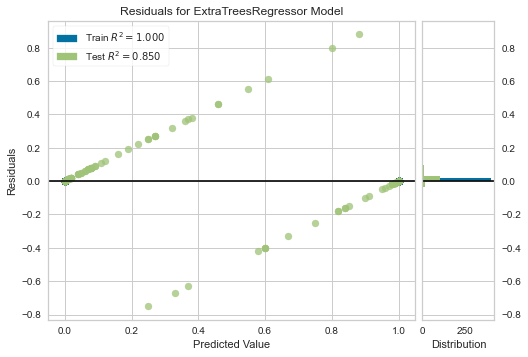

In [30]:
plot_model(et)

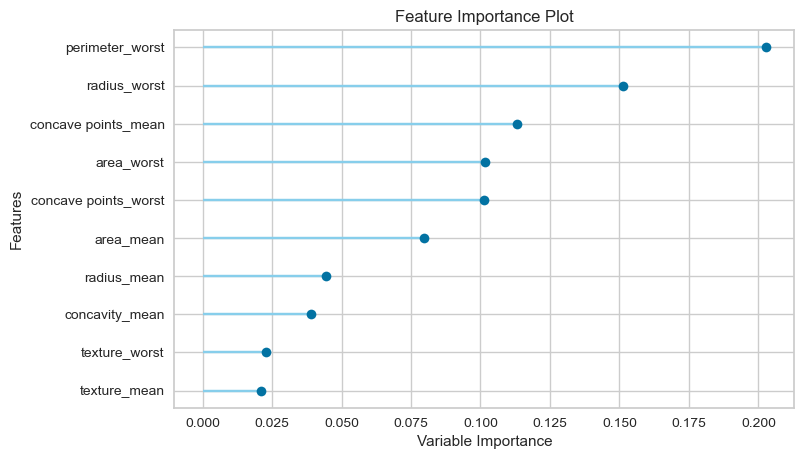

In [31]:
plot_model(et, plot='feature')

In [32]:
final_et = finalize_model(et)

In [33]:
display(final_et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8835, verbose=0, warm_start=False)

In [34]:
# A biblioteca ao salvar o modelo, já me entrega um pipeline pronto. 
save_model(final_et,'modelo-final')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['radius_mean',
                                                           'texture_mean',
                                                           'perimeter_mean',
                                                           'area_mean',
                                                           'smoothness_mean',
                                                           'compactness_mean',
                                                           'concavity_mean',
                                                           'concave points_mean',
                                                           'symmetry_m

# END


In [35]:
# A função predict_model também é usada para prever o conjunto de dados invisível.  
#Nesse exemplo irei usar o mesmo df que usei para o treinamento como proxy para novos conjuntos de dados invisíveis. 
#Na prática, predict_model função seria usada iterativamente com um novo conjunto de dados invisível.
predictions = predict_model(et, data = df)
predictions



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1.0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1.0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1.0


In [36]:
#Criei um dataframe entre os resultados do meu train e minha previsão, para comparar os resultados obtidos.
a = pd.DataFrame()
a['train']=predictions['diagnosis']
a['previsao']=round(predictions['Label'],0)
a

,train,previsao
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0
...,...,...
564,M,1.0
565,M,1.0
566,M,1.0
567,M,1.0


In [37]:
def resultado(x):
    if x ==0:
        return 'B'
    else:
        return'M'
    
a['previsao_cat']=a['previsao'].apply(resultado)
a

,train,previsao,previsao_cat
0,M,1.0,M
1,M,1.0,M
2,M,1.0,M
3,M,1.0,M
4,M,1.0,M
...,...,...,...
564,M,1.0,M
565,M,1.0,M
566,M,1.0,M
567,M,1.0,M


# Comparação do modelo.

Percentual de resultados de Teste:

B    63%
M    37%
Name: train, dtype: object
Percentual de resultados Previsão:

B    63%
M    37%
Name: previsao_cat, dtype: object


Text(0.5, 1.0, 'Resultados Modelo de Predição')

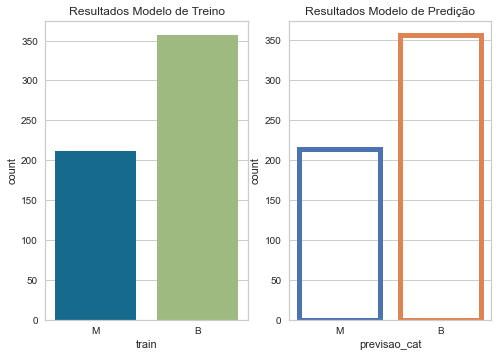

In [38]:
print('Percentual de resultados de Teste:\n')
print(a.train.value_counts(normalize=True).map('{:.0%}'.format))

print('Percentual de resultados Previsão:\n')
print(a.previsao_cat.value_counts(normalize=True).map('{:.0%}'.format))


fig, ax =plt.subplots(1,2)
fig = sns.countplot(a['train'], ax=ax[0])
fig2 = sns.countplot(a['previsao_cat'], ax=ax[1],facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('deep',2))
fig.set_title('Resultados Modelo de Treino')
fig2.set_title('Resultados Modelo de Predição')

In [39]:
#identificando as inconsistencias do modelo
a.loc[(a['train']=='M')& (a['previsao_cat']=='B')]

,train,previsao,previsao_cat
41,M,0.0,B
73,M,0.0,B
255,M,0.0,B
